In [13]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scipy.linalg import eigh
import qutip as qt
import sympy as sym

%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})
GHz = 1e9

|# Comparison of sqcircuit, numeric and spin-boson models vs truncation

In [14]:
Δ = 0.1
n_eig = 3
nmax_r_values = np.array([4,5,5,6,6 ,7 ,7 ,8 ,8 ,9 ])
nmax_f_values = np.array([6,6,8,8,10,10,12,12,14,14])

E_sq = []
E_frc  = []
E_sb = []

for nmax_r, nmax_f in zip(nmax_r_values, nmax_f_values):
    print(nmax_f)
    
    fluxonium = sq_ext.sq_fluxonium(Δ =Δ, trunc_res=nmax_r,trunc_flux=nmax_f)
    resonator = sq_ext.sq_resonator(Δ =Δ, trunc_res=nmax_r,trunc_flux=nmax_f)
    H_frc = sq_ext.hamiltonian_qubit(fluxonium, resonator, Δ=Δ)
    E = sq_ext.diag(H_frc, n_eig, out='GHz')[0]
    E_frc.append(E-E[0])
    del(H_frc)

    H_sb = sq_ext.spin_boson_qubit(nmax_r=nmax_r, nmax_f=nmax_f, Δ=Δ, N_R=2)
    E = eigh(H_sb, eigvals_only=True)
    E_sb.append(E-E[0])
    del(H_sb)
    
    H_sq = sq_ext.sq_qubit(Δ = Δ, trunc_res=nmax_r, trunc_flux=nmax_f)
    H_sq.diag(n_eig)
    E_sq.append(H_sq.efreqs-H_sq.efreqs[0])
    del(H_sq)
    
E_sq = np.array(E_sq )
E_frc  = np.array(E_frc  )
E_sb = np.array(E_sb )   

6
6
8
8
10
10
12
12
14
14


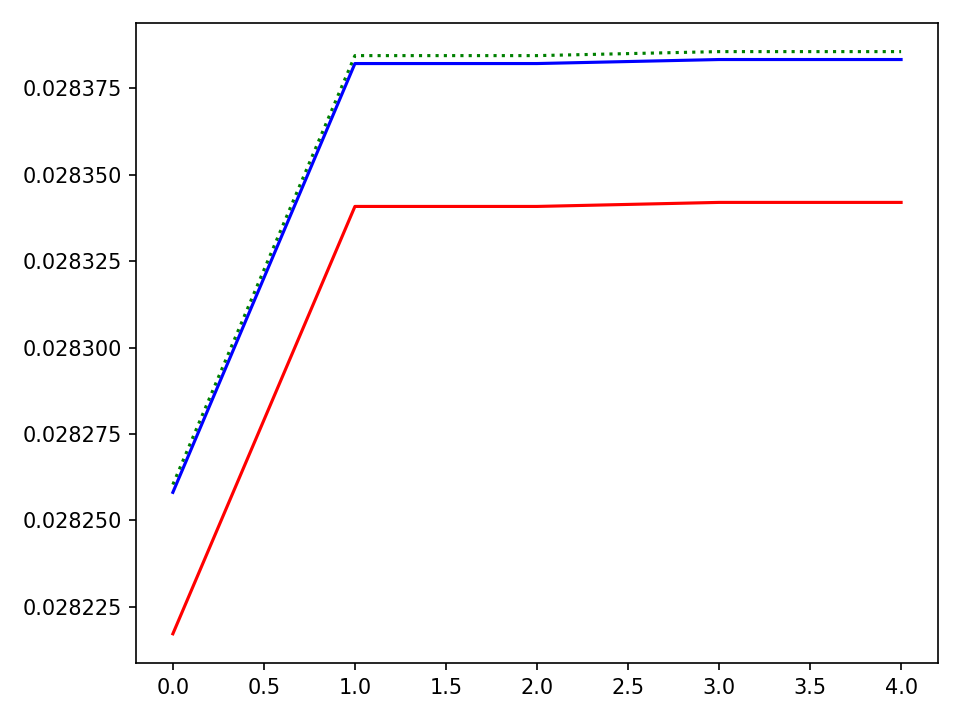

In [15]:
fig,  ax   = plt.subplots( dpi =150)

ax.plot(E_sq[5:, 1]-E_sq[0, 1], 'r' )
ax.plot(E_frc [5:, 1]-E_frc [0, 1], ':g')
ax.plot(E_sb[5:, 1]-E_sb[0, 1], 'b' )
    
fig.tight_layout()
fig.show()

In [19]:
importlib.reload(sq_ext)
Δ_values = np.geomspace(1e-4, 10, 30)
n_eig = 3
nmax_r = 10
nmax_f = 15

E_sq = []
E_frc  = []
E_sb = []


fluxonium_0 = sq_ext.sq_fluxonium(Δ=0, trunc_res=nmax_r,trunc_flux=nmax_f)
resonator_0 = sq_ext.sq_resonator(Δ=0, trunc_res=nmax_r,trunc_flux=nmax_f)
H_frc_0 = sq_ext.hamiltonian_qubit(fluxonium_0, resonator_0, Δ=0)

for Δ in Δ_values:

    fluxonium = sq_ext.sq_fluxonium(Δ =Δ, trunc_res=nmax_r,trunc_flux=nmax_f)
    resonator = sq_ext.sq_resonator(Δ =Δ, trunc_res=nmax_r,trunc_flux=nmax_f)
    H_frc = sq_ext.hamiltonian_qubit(fluxonium, resonator, Δ=Δ)
    E = sq_ext.diag(H_frc, n_eig, out='GHz')[0]
    E_frc.append(E-E[0])

    # H_sb = sq_ext.spin_boson_qubit(nmax_r=nmax_r, nmax_f=nmax_f, Δ=Δ, N_R=2)
    H_sb = sq_ext.H_eff_SWT(H_frc_0, H_frc, n_eig )
    E = sq_ext.diag(H_sb, n_eig, out='GHz', solver='numpy')[0]
    E_sb.append(E-E[0])
    del(H_frc)
    
    H_sq = sq_ext.sq_qubit(Δ = Δ, trunc_res=nmax_r, trunc_flux=nmax_f)
    H_sq.diag(n_eig)
    E_sq.append(H_sq.efreqs-H_sq.efreqs[0])
    del(H_sq)
    
E_sq = np.array(E_sq)
E_frc  = np.array(E_frc )
E_sb = np.array(E_sb)   

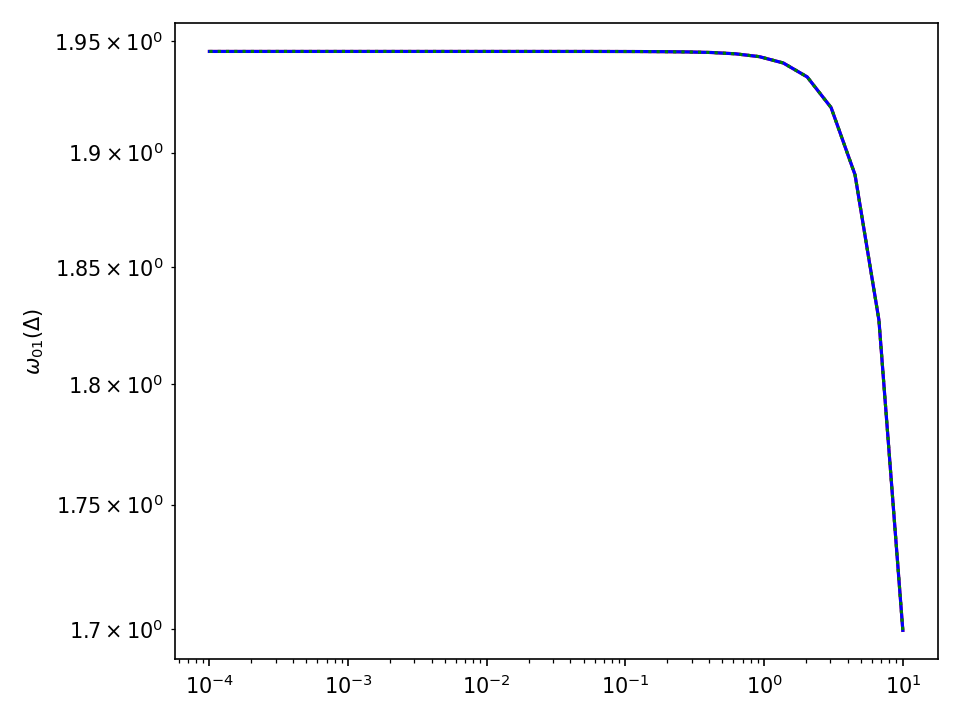

In [20]:
fig,  ax   = plt.subplots( dpi =150)
ω_01_sq = np.abs(E_sq[:, 1]-E_sq[:, 0])
ax.plot(Δ_values, np.abs(E_sq[:, 1] - E_sq[:, 0]), 'r')
ax.plot(Δ_values, np.abs(E_sb[:, 1] - E_sb[:, 0]), 'b')
ax.plot(Δ_values, np.abs(E_frc [:, 1] - E_frc [:, 0]), ':g')
# ax.plot(Δ_values, np.abs(E_frc [:, 1]-E_frc [:, 0] - ω_01_sq ) , ':g')
ax.set_ylabel(r'$\omega_{01}(\Delta)$')
ax.set_xscale('log')
ax.set_yscale('log')
    
fig.tight_layout()
fig.show()
plt.close('all')

In [7]:
flux_0 = sq_ext.sq_fluxonium(Δ=0,trunc_flux=35)
flux   = sq_ext.sq_fluxonium(Δ=10,trunc_flux=35)

In [64]:
sq_ext.H_eff_SWT(flux_0.hamiltonian(),flux.flux_op(0),2)

array([[-0.000000034522, -0.000000001176],
       [-0.000000001176, -0.000000032226]])

In [65]:
sq_ext.H_eff_SWT(flux.hamiltonian(),flux.flux_op(0),2)

array([[-0.000000034768, -0.000000000870],
       [-0.000000000870, -0.000000031979]])

In [68]:
flux.diag(2)
flux.flux_op(0, basis='eig')/2/np.pi/GHz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.000000000000 0.000000004827]
 [0.000000004827 0.000000000000]]

In [69]:
sq_ext.H_eff_p1(flux.hamiltonian(),flux.flux_op(0),2) 

array([[0.000000000000, 0.000000004827],
       [0.000000004827, -0.000000000000]])

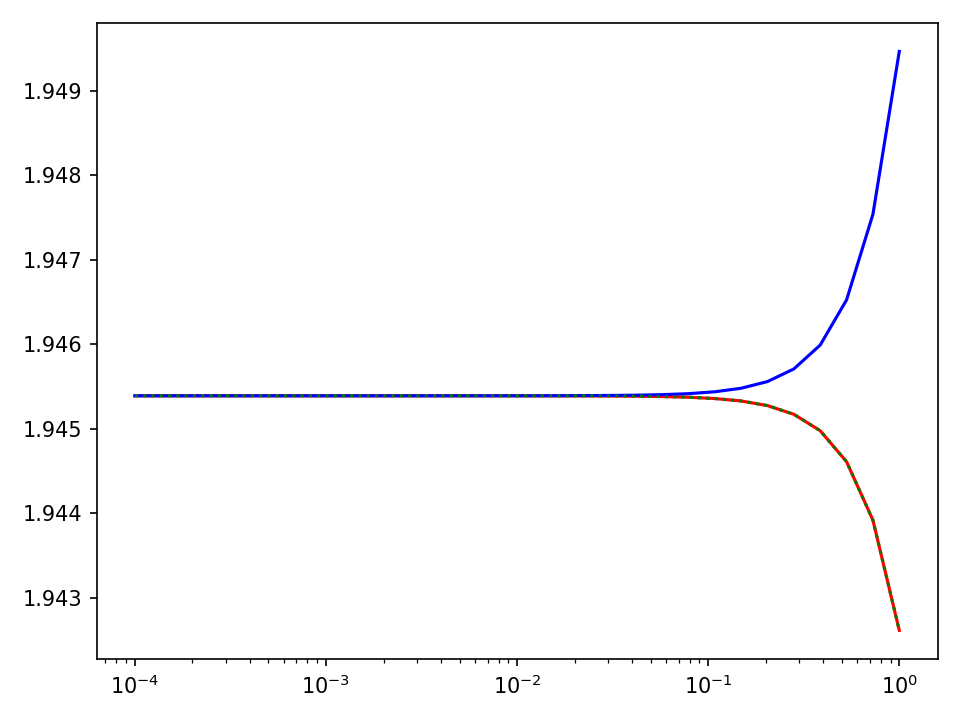

In [4]:
fig,  ax   = plt.subplots( dpi =150)

ax.plot(Δ_values, E_sq[:, 1], 'r' )
ax.plot(Δ_values, E_sb[:, 1], 'b' )
ax.plot(Δ_values, E_frc [:, 1], ':g')
ax.set_xscale('log')
# ax.set_yscale('log')
    
fig.tight_layout()
fig.show()

In [47]:
importlib.reload(sq_ext)
Δ = 0.1
param_values = np.geomspace(1, 100, 50)
n_eig = 3
nmax_r = 10
nmax_f = 15

E_sq = []
E_frc  = []
E_sb = []

for Lq in param_values:
    fluxonium = sq_ext.sq_fluxonium(Lq=Lq, trunc_res=nmax_r,trunc_flux=nmax_f)
    resonator = sq_ext.sq_resonator(Lq=Lq, trunc_res=nmax_r,trunc_flux=nmax_f)
    H_frc = sq_ext.hamiltonian_qubit(fluxonium, resonator, Δ=Δ, Lq=Lq)
    E = sq_ext.diag(H_frc, n_eig, out='GHz')[0]
    E_frc.append(E-E[0])
    del(H_frc)

    H_sb = sq_ext.spin_boson_qubit(nmax_r=nmax_r, nmax_f=nmax_f, Lq=Lq, N_R=2)
    E = eigh(H_sb, eigvals_only=True)
    E_sb.append(E-E[0])
    del(H_sb)
    
    H_sq = sq_ext.sq_qubit(Lq=Lq, trunc_res=nmax_r, trunc_flux=nmax_f)
    H_sq.diag(n_eig)
    E_sq.append(H_sq.efreqs-H_sq.efreqs[0])
    del(H_sq)
    
E_sq = np.array(E_sq )
E_frc  = np.array(E_frc  )
E_sb = np.array(E_sb )   

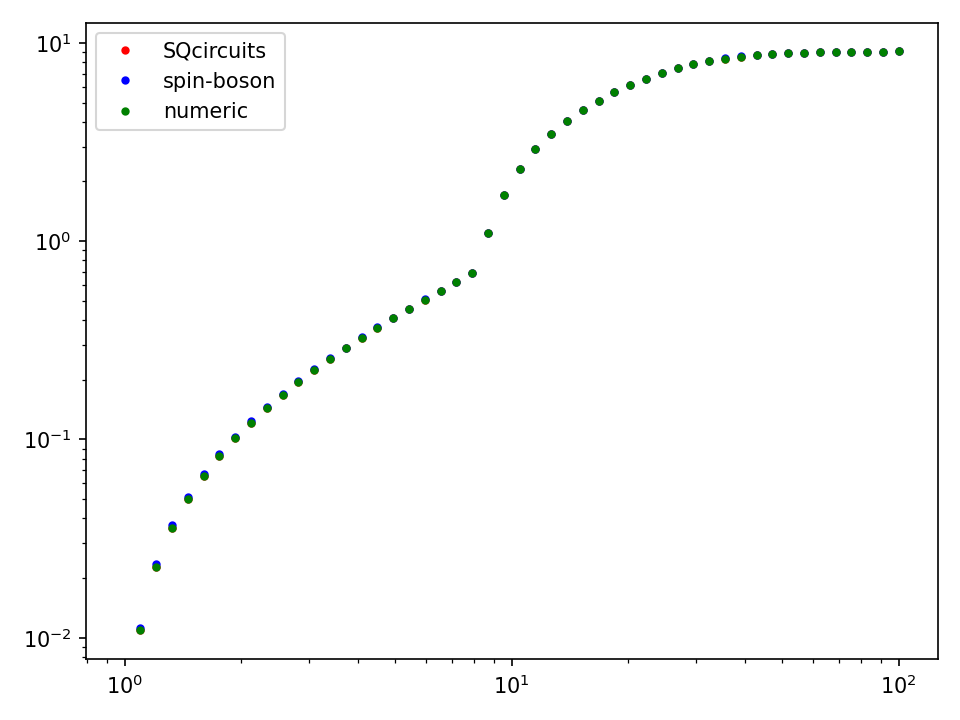

In [48]:
fig,  ax   = plt.subplots( dpi =150)

ax.plot(param_values, np.abs(E_sq[:, 1]-E_sq[0, 1]), '.r', label='SQcircuits' )
ax.plot(param_values, np.abs(E_sb[:, 1]-E_sb[0, 1]), '.b', label='spin-boson' )
ax.plot(param_values, np.abs(E_frc [:, 1]-E_frc [0, 1]), '.g', label='numeric'    )
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()    
fig.tight_layout()
fig.show()

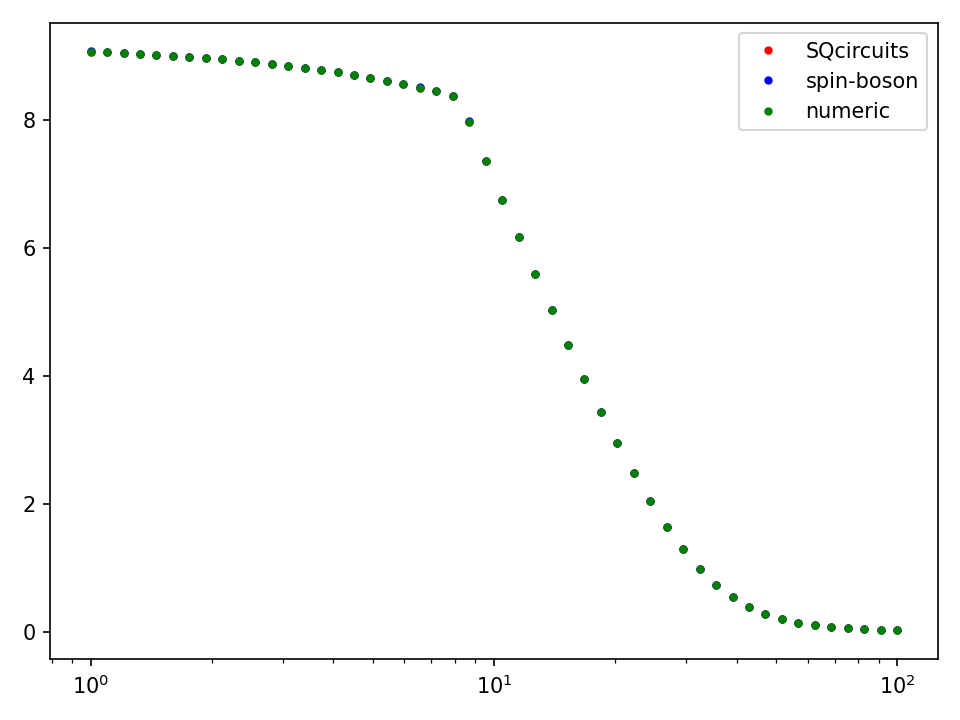

In [51]:
fig,  ax   = plt.subplots( dpi =150)

ax.plot(param_values, E_sq[:, 1], '.r', label='SQcircuits' )
ax.plot(param_values, E_sb[:, 1], '.b', label='spin-boson' )
ax.plot(param_values, E_frc [:, 1], '.g', label='numeric'    )
ax.set_xscale('log')
ax.legend()    
# ax.set_yscale('log')
    
fig.tight_layout()
fig.show()
qt.tensor_contract()

In [33]:
plt.close('all')